In [ ]:
!pip install bar_chart_race
!apt install -y ffmpeg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import bar_chart_race as bcr
from IPython.display import HTML,display
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

     |████████████████████████████████| 156 kB 9.6 MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-n

**Analyzing COVID - 19 Deaths(from 2020-01-22 to 2020-07-27) by date for each country using bar_chart_race module**

In [ ]:
df_full_grouped = pd.read_csv('full_grouped.csv')
df_full_grouped

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean
35152,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa
35153,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean
35154,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa


In [ ]:
df_full_grouped_deaths_chart = df_full_grouped.pivot(index='Date', columns = 'Country/Region', values = 'Deaths')
df_deaths_chart = df_full_grouped_deaths_chart.fillna(df_full_grouped_deaths_chart.mean())
df_deaths_chart

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,South Africa,South Korea,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,56,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-23,1211,123,1124,52,33,3,2702,688,139,711,391,11,134,2801,7,519,9812,2,34,0,2407,274,1,84082,3,329,53,6,1,21,0,382,8918,58,75,8838,4649,7688,7,50,...,508,0,66,27,28,115,93,6093,298,45,28429,11,708,23,5676,1975,35,7,58,21,58,0,16,8,50,5563,144430,0,1570,342,45639,34,103,129,0,67,1,461,134,28
2020-07-24,1225,128,1136,52,35,3,2807,692,145,711,400,11,136,2836,7,524,9817,2,34,0,2473,280,1,85238,3,337,53,6,1,22,0,385,8922,59,75,8914,4650,7975,7,51,...,518,0,66,27,28,115,93,6343,298,45,28432,11,715,23,5697,1977,35,7,58,21,58,0,17,8,50,5580,145560,1,1591,343,45762,34,106,134,0,70,1,469,136,32
2020-07-25,1248,134,1146,52,39,3,2893,700,155,712,408,11,137,2874,7,530,9821,2,34,0,2535,280,1,86449,3,338,53,6,1,22,0,385,8928,59,75,9020,4652,8269,7,51,...,518,0,66,27,28,116,93,6655,298,45,28432,11,717,23,5697,1977,36,7,59,21,58,0,17,8,50,5596,146465,1,1610,343,45823,34,111,138,0,75,1,474,139,34


In [ ]:
df_death_chart_simplified = df_deaths_chart.iloc[::2]
bcr.bar_chart_race(df=df_death_chart_simplified,
                              filename=None,
                              orientation='h',
                              sort='desc',
                              n_bars=10,
                              label_bars=True,
                              steps_per_period=10,
                              period_length=500,
                              figsize=(5, 3),
                              cmap='dark24',
                              title='Covid-19 Deaths from 2020-01-22 to 2020-07-27',
                              bar_label_size=8,
                              tick_label_size=7,
                              fig=None)

**Analyzing world-wide COVID-19 Deaths, Confirmed, Active and Recovered Cases from 2020-01-22 to 2020-07-27 using line plot and matplotlib**

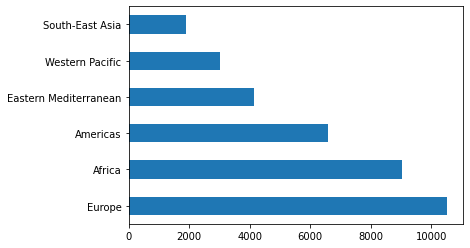

In [ ]:
df_full_grouped_1 = pd.read_csv('full_grouped.csv', parse_dates= ['Date'])
df_full_grouped_1['WHO Region'].value_counts().plot(kind='barh')

In [ ]:
df_full_grouped_1_cleaned = df_full_grouped_1.drop(labels = ['Country/Region','WHO Region','New cases','New deaths', 'New recovered'], axis = 1)
df_full_grouped_1_cleaned

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,0,0,0,0
1,2020-01-22,0,0,0,0
2,2020-01-22,0,0,0,0
3,2020-01-22,0,0,0,0
4,2020-01-22,0,0,0,0
...,...,...,...,...,...
35151,2020-07-27,10621,78,3752,6791
35152,2020-07-27,10,1,8,1
35153,2020-07-27,1691,483,833,375
35154,2020-07-27,4552,140,2815,1597


In [ ]:
df_full_grouped_1_cleaned_new = df_full_grouped_1_cleaned.set_index(df_full_grouped_1_cleaned['Date']).drop(labels = 'Date', axis = 1)
df_full_grouped_1_cleaned_new

,Confirmed,Deaths,Recovered,Active
Date,,,,
2020-01-22,0,0,0,0
2020-01-22,0,0,0,0
2020-01-22,0,0,0,0
2020-01-22,0,0,0,0
2020-01-22,0,0,0,0
...,...,...,...,...
2020-07-27,10621,78,3752,6791
2020-07-27,10,1,8,1
2020-07-27,1691,483,833,375


In [ ]:
date_list = []
for i in df_full_grouped_1_cleaned_new.index:
    date_list.append(i)
date_set = set(date_list)
date_new_list = list(date_set)
len(date_list), len(date_set), len(date_new_list)

(35156, 188, 188)

In [ ]:
confirmed_list = []
active_list = []
deaths_list = []
recovered_list = []
for i in date_set:
    x = df_full_grouped_1_cleaned_new[df_full_grouped_1_cleaned_new.index == i]
    confirmed_list.append(x['Confirmed'].sum())
for i in date_set:
    x = df_full_grouped_1_cleaned_new[df_full_grouped_1_cleaned_new.index == i]
    active_list.append(x['Active'].sum())
for i in date_set:
    x = df_full_grouped_1_cleaned_new[df_full_grouped_1_cleaned_new.index == i]
    deaths_list.append(x['Active'].sum())
for i in date_set:
    x = df_full_grouped_1_cleaned_new[df_full_grouped_1_cleaned_new.index == i]
    recovered_list.append(x['Recovered'].sum())
len(confirmed_list), len(active_list), len(deaths_list), len(recovered_list)

(188, 188, 188, 188)

In [ ]:
new_df_list = [date_set, confirmed_list, active_list, deaths_list, recovered_list]
new_df = pd.DataFrame(new_df_list, index = ['Date', 'Confirmed', 'Active', 'Deaths', 'Recovered'])
new_df_2 = new_df.T
new_df_grouped_full = new_df_2.set_index(new_df_2['Date']).drop(labels = 'Date', axis = 1).sort_values(by='Date')
new_df_grouped_full

,Confirmed,Active,Deaths,Recovered
Date,,,,
2020-01-22,555,510,510,28
2020-01-23,654,606,606,30
2020-01-24,941,879,879,36
2020-01-25,1434,1353,1353,39
2020-01-26,2118,2010,2010,52
...,...,...,...,...
2020-07-23,15510481,6166006,6166006,8710969
2020-07-24,15791645,6212290,6212290,8939705
2020-07-25,16047190,6243930,6243930,9158743


[Text(0, 0.5, 'Number of COVID -19 Cases'),
 Text(0.5, 0, 'Date'),
 Text(0.5, 1.0, 'COVID - 19 Cases from 2020-01-22 to 2020-07-27')]

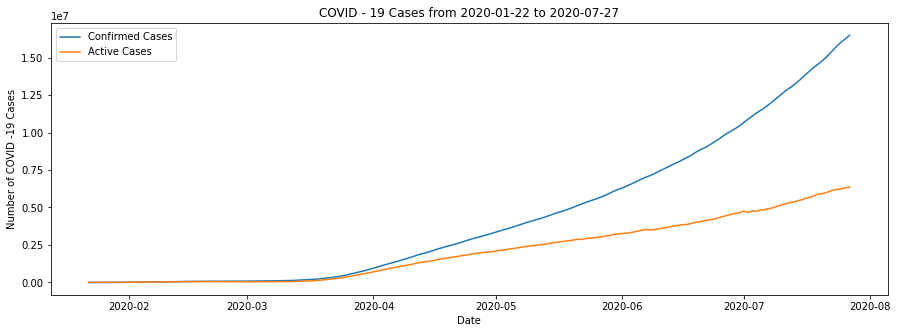

In [ ]:
x = new_df_grouped_full.index
y = new_df_grouped_full['Confirmed']
z = new_df_grouped_full['Active']
fig, ax = plt.subplots(figsize = (15,5))
ax.plot(x,y,z ,linewidth = 1.5)
ax.legend(['Confirmed Cases','Active Cases'])
ax.set(title = "COVID - 19 Cases from 2020-01-22 to 2020-07-27", xlabel = "Date", ylabel = "Number of COVID -19 Cases")

In [ ]:
filePath = 'worldometer_data.csv'
covid_data = pd.read_csv(filePath, index_col = "Country/Region")

A univariate analysis - Total Deaths per 1 million of Population per Country

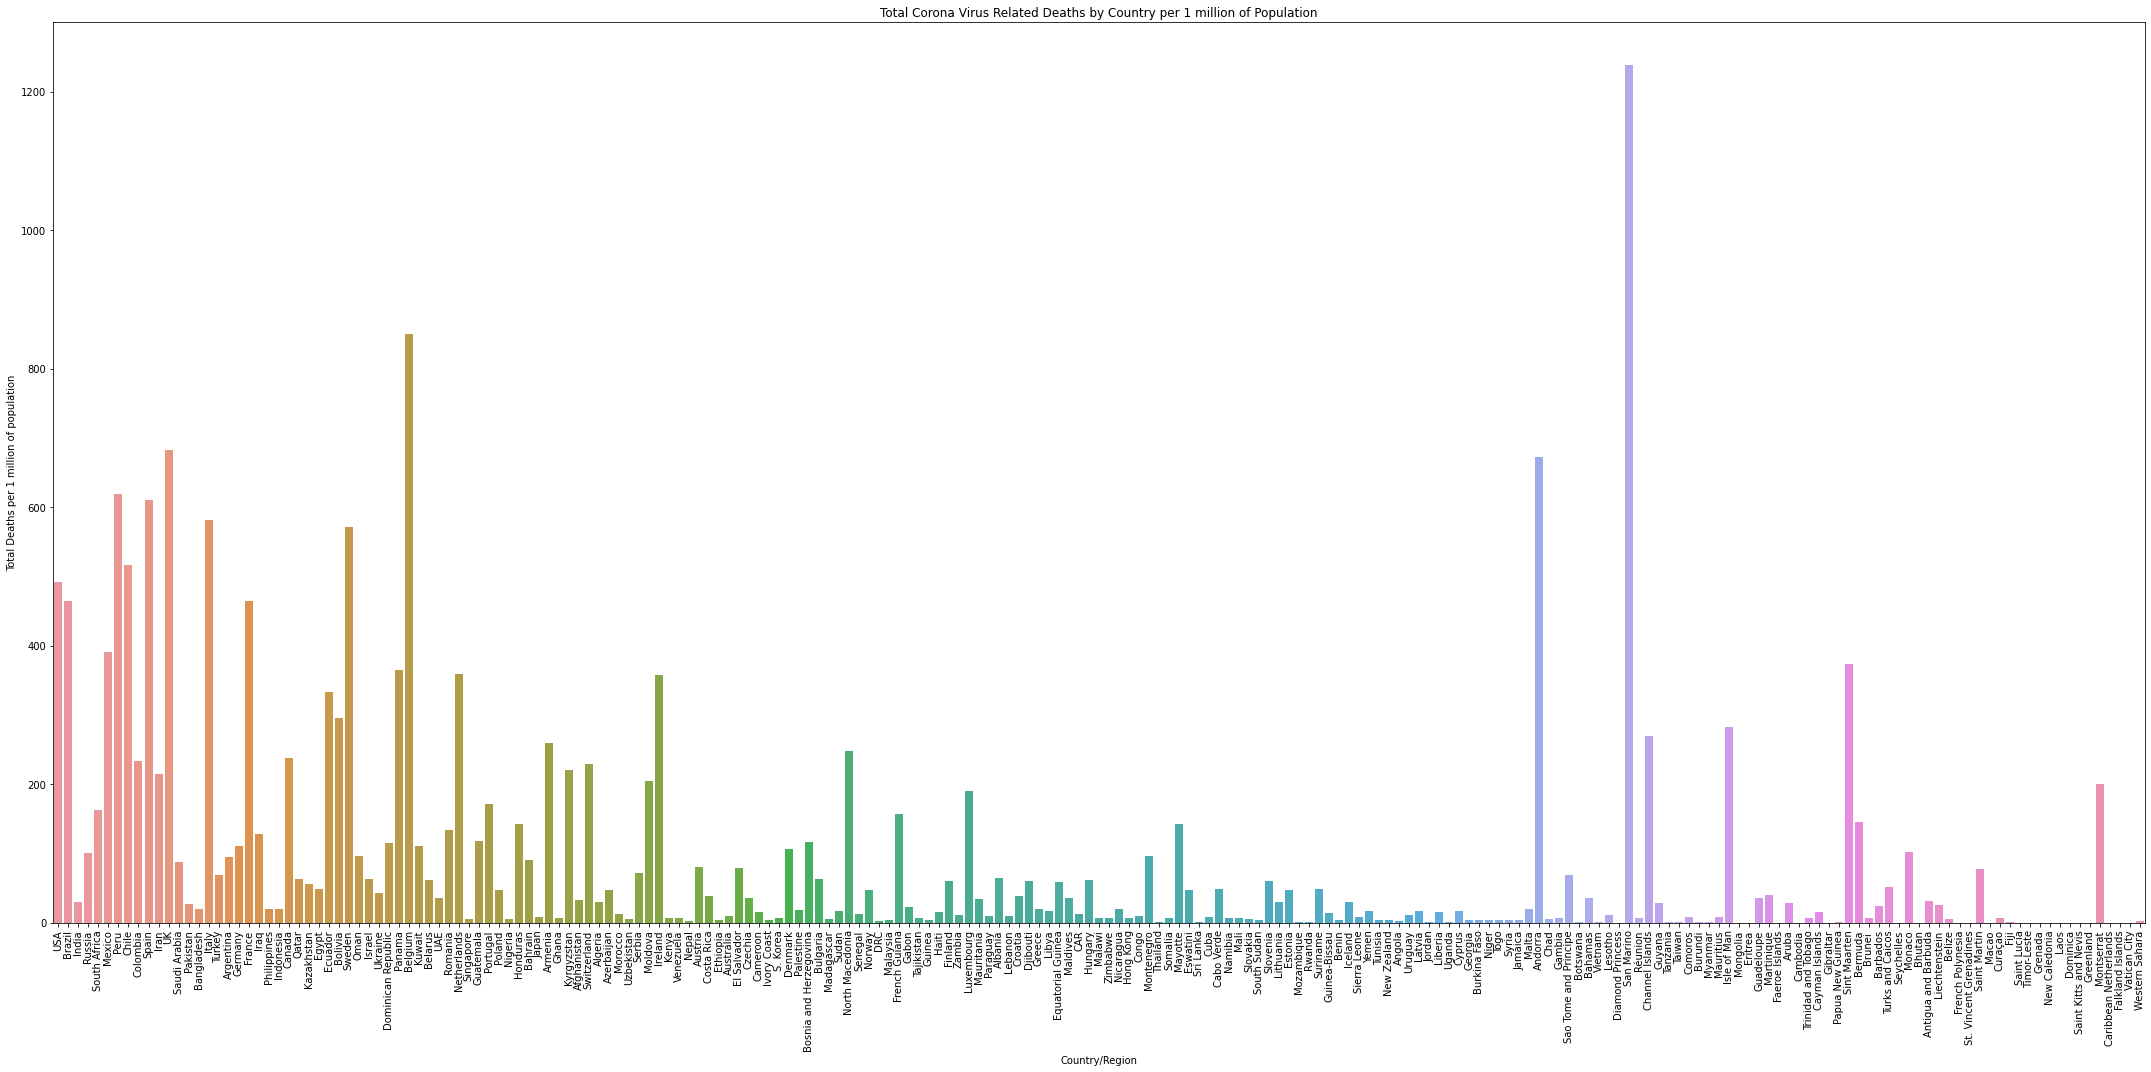

In [ ]:
plt.figure(figsize=(30,15))

# Add title
plt.title("Total Corona Virus Related Deaths by Country per 1 million of Population")

# Bar chart 
sns.barplot(x=covid_data.index, y=covid_data['Deaths/1M pop'])

# Add label for vertical axis
plt.ylabel("Total Deaths per 1 million of population")
plt.xticks(rotation=90) 
plt.tight_layout()

In depth univariate analysis of deaths per 1 million of population:

In [ ]:
covid_data['Deaths/1M pop'].describe()

count     187.000000
mean       98.681176
std       174.956862
min         0.080000
25%         6.000000
50%        29.000000
75%        98.000000
max      1238.000000
Name: Deaths/1M pop, dtype: float64

A Bivariate analysis - Total Tests By Country per 1 million of Population vs Total Deaths By Country per 1 million of Population




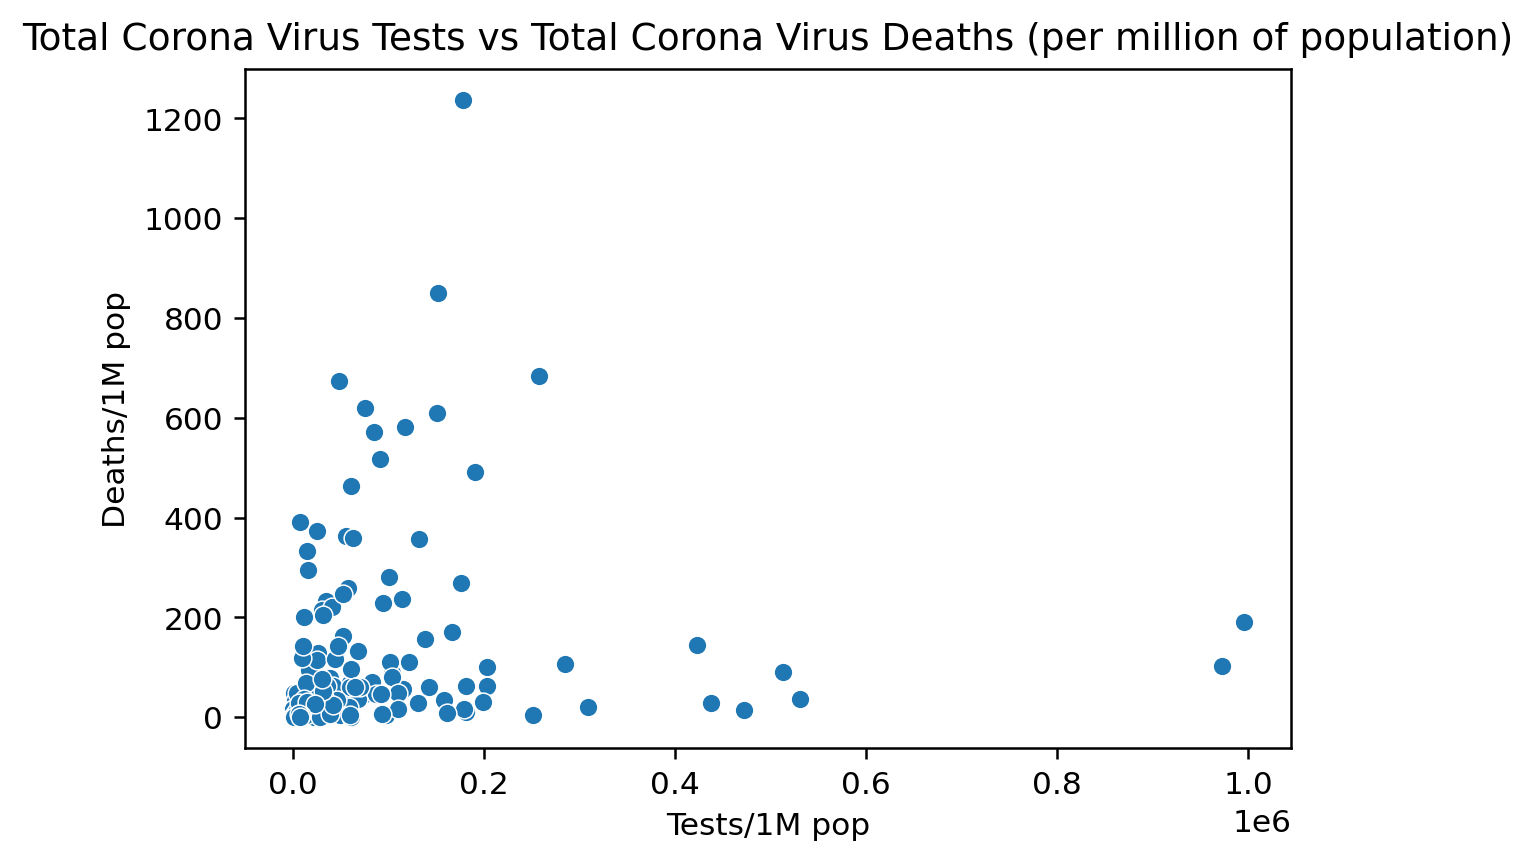

In [ ]:
plt.figure(dpi=225)

# Add title
plt.title("Total Corona Virus Tests vs Total Corona Virus Deaths (per million of population)")
sns.scatterplot(x = covid_data['Tests/1M pop'], y = covid_data['Deaths/1M pop'])
plt.show()


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px

pio.templates.default = "plotly_dark"

In [ ]:
df=pd.read_csv("country_wise_latest.csv")
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [ ]:
grouped=df[["Confirmed","Deaths","Recovered","Country/Region"]]
grouped.head()

,Confirmed,Deaths,Recovered,Country/Region
0,36263,1269,25198,Afghanistan
1,4880,144,2745,Albania
2,27973,1163,18837,Algeria
3,907,52,803,Andorra
4,950,41,242,Angola


In [ ]:
px.scatter_3d(grouped,x="Confirmed",y="Deaths",z="Recovered")

In [ ]:
grouped["TOTAL"]=grouped["Confirmed"]+grouped['Deaths']+grouped["Recovered"]
grouped.head()

,Confirmed,Deaths,Recovered,Country/Region,TOTAL
0,36263,1269,25198,Afghanistan,62730
1,4880,144,2745,Albania,7769
2,27973,1163,18837,Algeria,47973
3,907,52,803,Andorra,1762
4,950,41,242,Angola,1233
